# 0.1.0 Load Data
* Codex Data obtained from: http://welikesharingdata.blob.core.windows.net/forshare/index.html
* Manuscript: https://www.cell.com/cell/pdf/S0092-8674(18)30904-8.pdf

In [42]:
import pandas as pd
df = {}

In [43]:
from clustergrammer2 import net

In [44]:
import ipywidgets as widgets
import numpy as np
from bqplot import pyplot as plt
import bqplot

In [45]:
from glob import glob

## Check available Files

In [46]:
glob('../data/big_data/*.txt')

['../data/big_data/channelNames_BALBcMRLdataset.txt']

In [47]:
glob('../data/big_data/*.csv')

['../data/big_data/CODEX_MRLdataset_neighborhood_graph.csv',
 '../data/big_data/BALBcMRLdataset_exposuretimes.csv',
 '../data/big_data/Suppl.Table2.CODEX_paper_MRLdatasetexpression.csv']

### Expression Data
See http://welikesharingdata.blob.core.windows.net/forshare/index.html

* CSV file contains mean marker intensities and X, Y, Z corrdinates for each cell relative to the top left corner of its tile. 
* Tile IDs correspond to tile images sorted in the alphanumeric order
* Size parameter corresponds to the cell object sizes in voxels
* "imaging phenotype Cluster ID" column specifies the phenotypic cluster identity as determined by X-shift
* "niche Cluster ID" column specifies the i-niche cluster determined by K-means (K=100)
* neighborhood graph files describes which pairs of cells are adjacent to one another

In [48]:
%%time
df['exp'] = pd.read_csv('../data/big_data/Suppl.Table2.CODEX_paper_MRLdatasetexpression.csv')
new_rows = ['C-' + str(x) for x in df['exp'].index.tolist()]
df['exp'].index = new_rows
print(df['exp'].shape)

(734101, 38)
CPU times: user 8.91 s, sys: 615 ms, total: 9.53 s
Wall time: 8.77 s


In [49]:
df['exp'].head()

,Imaging phenotype cluster ID,CD45,Ly6C,TCR,Ly6G,CD19,CD169,CD106,CD3,CD1632,...,CD44,NKp46,X.X,Y.Y,Z.Z,MHCII,blank_Cy3_cyc15,blank_Cy5_cyc15,sample_Xtile_Ytile,niche cluster ID
C-0,9600,1577.675415,-154.301758,130.692184,-4.168493,560.691345,-504.231476,854.670105,-631.294189,385.935242,...,422.408691,515.130066,10,70,13,6712.812988,1665.967896,398.348389,BALBc-3_X05_Y03,32.0
C-1,9600,1017.838440,-93.069397,144.076584,40.010998,885.595520,-391.357544,62.764454,-474.201172,-469.634583,...,448.701660,171.880310,1000,294,12,2024.678711,1287.959229,421.991425,BALBc-3_X01_Y02,99.0
C-2,9600,5978.459961,-330.099365,139.631744,-82.840302,1747.897583,-395.508820,954.326782,-1026.204468,3744.718262,...,2229.804443,512.220764,1003,107,8,8647.193359,2817.173828,709.545105,BALBc-2_X05_Y04,74.0
C-3,9600,6119.109375,-54.384808,-768.871704,25.625927,1065.311890,-485.535431,538.404175,-611.836426,865.842590,...,665.720459,351.108246,1003,113,13,4838.463379,1646.660278,408.523590,BALBc-2_X03_Y04,98.0
C-4,9600,6272.474609,-235.512405,74.058075,-101.729919,1186.295044,-782.744995,1261.625366,-915.565552,1361.536011,...,2065.742676,259.003235,1003,148,9,5092.891602,2161.109131,713.416199,BALBc-2_X02_Y01,71.0


In [50]:
cols = df['exp'].columns.tolist()
cols

['Imaging phenotype cluster ID',
 'CD45',
 'Ly6C',
 'TCR',
 'Ly6G',
 'CD19',
 'CD169',
 'CD106',
 'CD3',
 'CD1632',
 'CD8a',
 'CD90',
 'F480',
 'CD11c',
 'Ter119',
 'CD11b',
 'IgD',
 'CD27',
 'CD5',
 'CD79b',
 'CD71',
 'CD31',
 'CD4',
 'IgM',
 'B220',
 'ERTR7',
 'CD35',
 'CD2135',
 'CD44',
 'NKp46',
 'X.X',
 'Y.Y',
 'Z.Z',
 'MHCII',
 'blank_Cy3_cyc15',
 'blank_Cy5_cyc15',
 'sample_Xtile_Ytile',
 'niche cluster ID']

In [51]:
exp_cols = cols[1:30]
exp_cols

['CD45',
 'Ly6C',
 'TCR',
 'Ly6G',
 'CD19',
 'CD169',
 'CD106',
 'CD3',
 'CD1632',
 'CD8a',
 'CD90',
 'F480',
 'CD11c',
 'Ter119',
 'CD11b',
 'IgD',
 'CD27',
 'CD5',
 'CD79b',
 'CD71',
 'CD31',
 'CD4',
 'IgM',
 'B220',
 'ERTR7',
 'CD35',
 'CD2135',
 'CD44',
 'NKp46']

In [52]:
unique_dict = {}
for inst_col in cols:
    inst_list_unique = list(df['exp'][inst_col].unique())
    unique_dict[inst_col] = inst_list_unique    
    inst_num_unique = len(inst_list_unique)
    print(inst_col, inst_num_unique)

Imaging phenotype cluster ID 58
CD45 726877
Ly6C 731257
TCR 731035
Ly6G 729442
CD19 726981
CD169 730498
CD106 727870
CD3 730526
CD1632 728506
CD8a 728773
CD90 728172
F480 731091
CD11c 725943
Ter119 728879
CD11b 725897
IgD 730293
CD27 727817
CD5 730295
CD79b 727003
CD71 729364
CD31 725039
CD4 730112
IgM 727925
B220 729995
ERTR7 729781
CD35 728492
CD2135 729290
CD44 727003
NKp46 723719
X.X 1342
Y.Y 1006
Z.Z 15
MHCII 729269
blank_Cy3_cyc15 721818
blank_Cy5_cyc15 720065
sample_Xtile_Ytile 565
niche cluster ID 101


### Select Single Image Tile
BALBc: normal tissue
MRL/lpr: spleen from animals with systemic autoimmune disease

Start with: 'BALBc-1_X01_Y01'

In [53]:
ser_tile = df['exp']['sample_Xtile_Ytile']
ser_found = ser_tile[ser_tile == 'BALBc-1_X01_Y01']
ser_found.shape

(1127,)

In [54]:
keep_rows = ser_found.index.tolist()

In [55]:
df['tile'] = df['exp'].loc[keep_rows]
df['tile'].shape

(1127, 38)

In [56]:
df['tile'].head()

,Imaging phenotype cluster ID,CD45,Ly6C,TCR,Ly6G,CD19,CD169,CD106,CD3,CD1632,...,CD44,NKp46,X.X,Y.Y,Z.Z,MHCII,blank_Cy3_cyc15,blank_Cy5_cyc15,sample_Xtile_Ytile,niche cluster ID
C-643,9640,4616.200684,109.183311,56.608055,16.112137,1381.899780,-117.029999,2926.800781,-535.518738,2204.415283,...,1706.060791,557.229370,10,277,9,2071.258301,1494.528198,635.465454,BALBc-1_X01_Y01,84.0
C-1264,9640,1820.992798,-193.428802,-253.548187,-108.620682,1434.961548,-649.734192,1689.791626,-951.155151,1138.589111,...,3177.853271,317.274445,1006,490,9,2678.717529,1627.878540,582.699951,BALBc-1_X01_Y01,99.0
C-1589,9640,2748.407715,1080.912109,155.408829,290.299347,1872.106323,-265.814697,1627.306641,-900.948425,3623.654297,...,3632.079346,439.367004,101,504,9,5202.269043,2970.291016,1610.805420,BALBc-1_X01_Y01,91.0
C-1611,9640,1670.639282,162.775330,479.413391,156.224304,898.696411,312.997375,490.886322,262.397064,3911.160889,...,2143.739746,412.681335,101,759,8,521.500000,760.530396,606.023438,BALBc-1_X01_Y01,84.0
C-1873,9640,1783.568970,-83.423607,980.420288,79.349449,1206.731445,469.170441,1557.618408,539.484131,1223.671753,...,1267.455688,306.992889,1013,254,6,307.573090,860.657837,818.229736,BALBc-1_X01_Y01,93.0


### Plot Tile Expression Levels

In [57]:
df['tile-exp'] = df['tile'][exp_cols].transpose()
df['tile-exp'].shape

(29, 1127)

### Set Negative Expression Levels to Zero

In [58]:
df['tile-exp'][df['tile-exp'] < 0] = 0

In [59]:
df['tile-exp'].transpose().describe()

,CD45,Ly6C,TCR,Ly6G,CD19,CD169,CD106,CD3,CD1632,CD8a,...,CD71,CD31,CD4,IgM,B220,ERTR7,CD35,CD2135,CD44,NKp46
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,...,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,2227.386933,320.462620,801.855738,237.354865,995.305121,372.464357,2218.644636,393.465683,2289.842578,953.257450,...,345.248557,1612.862087,694.813556,487.676127,1011.677069,1496.511917,485.104105,90.703214,2639.046760,605.289154
std,1744.207747,1804.326714,2026.346472,1401.532611,2246.645501,1614.248883,2642.061696,1281.174377,3948.655321,1918.905962,...,602.629283,1408.478027,1612.171357,1650.832599,1146.848826,2180.446250,781.089923,121.852499,2305.064993,862.134460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,855.441833,0.000000,88.477158,0.000000,321.815338,0.000000,690.838135,0.000000,451.506943,133.870949,...,0.000000,761.176971,0.000000,80.450752,0.000000,225.052689,212.526001,0.000000,820.787323,270.897263
50%,1975.485962,76.415504,394.730377,42.606205,726.309387,3.330147,1627.306641,0.000000,1352.493652,551.650635,...,112.943901,1348.967896,231.637939,215.148560,672.301147,903.783081,368.268921,62.909431,2262.735596,427.055115
75%,3301.116211,226.595772,756.756622,133.327179,1163.773071,363.036209,2966.002197,411.800278,2564.916748,1082.343811,...,360.455078,2138.005981,655.641144,467.981979,1649.294434,1780.571533,539.913208,124.815590,3894.320557,616.015900
max,13019.573242,36380.929688,28300.804688,27910.125000,32945.343750,27001.564453,33125.109375,16590.681641,53697.683594,27838.951172,...,5450.304688,15061.892578,18621.835938,25429.027344,5967.472168,19644.873047,10692.055664,1460.630005,17053.437500,9143.376953


In [88]:
net.load_df(df['tile-exp'])
net.normalize(axis='row', norm_type='zscore')
df['tile-exp-z'] = net.export_df()

### Expression Levels

In [89]:
net.load_df(df['tile-exp-z'])
net.clip(-5,5)
net.widget()

ExampleWidget(network='{"row_nodes": [{"name": "CD45", "ini": 29, "clust": 25, "rank": 27, "rankvar": 27, "gro…

In [63]:
df['tile-loc'] = df['tile'][['X.X', 'Y.Y']]
df['tile-loc'].shape

(1127, 2)

In [ ]:
df['til']

In [111]:
ser_opacity.max()

21270.966796875

In [108]:
type(list_opacity[0])

float

In [117]:
fig = plt.figure(title='Scatter', min_height='10px', min_width='10px')
# def_tt = Tooltip(fields=['x'], formats=[''])
scatter = plt.scatter(df['tile-loc']['X.X'], 
                        df['tile-loc']['Y.Y'], 
                        figsize=(20,10), 
                        ylim=(0,1000), xlim=(0,1000), stroke='black')

# panzoom = bqplot.interacts.PanZoom()
# fig.scale_x.min=0
# fig.scale_x.max=10

# fig.layout.height = '10000'
inst_width = 900
fig.layout.min_height = str(inst_width/1.2) + 'px'
fig.layout.min_width = str(inst_width) + 'px'

# scatter.default_opacities = [0.5] 
# scatter.default_opacities = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.2, 0.1, 0.1]

ser_opacity = df['tile-exp'].loc['CD106']
list_opacity = [float(x/ser_opacity.max()) for x in list(ser_opacity.get_values())]

scatter.default_opacities = list_opacity
scatter.default_size = 250

fig

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top':…

### Trying to Plot Voroni

In [24]:
points = np.random.rand(10,2)

In [25]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(df['tile-loc'])

In [26]:
vor.vertices

array([[3083.11538462,  246.14102564],
       [1319.95714286,   -6.95918367],
       [1309.91747573,   36.06796117],
       ...,
       [ 307.35454545,  343.87272727],
       [ 299.24416517,  388.32315978],
       [ 305.63136456,  388.05702648]])

In [30]:
# for inst_region in vor.regions:
#     print(len(inst_region))

TypeError: 'Figure' object is not callable

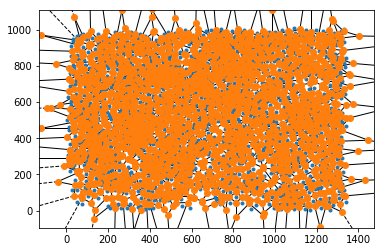

In [31]:
fig_vor = voronoi_plot_2d(vor)
fig_vor()

In [ ]:
fig_vor
fig

# Colorize Voroni Regions

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi

In [33]:
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()*2

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all([v >= 0 for v in vertices]):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

In [35]:
df['tile-loc'].columns.tolist()

['X.X', 'Y.Y']

(5.0, 1006.0)

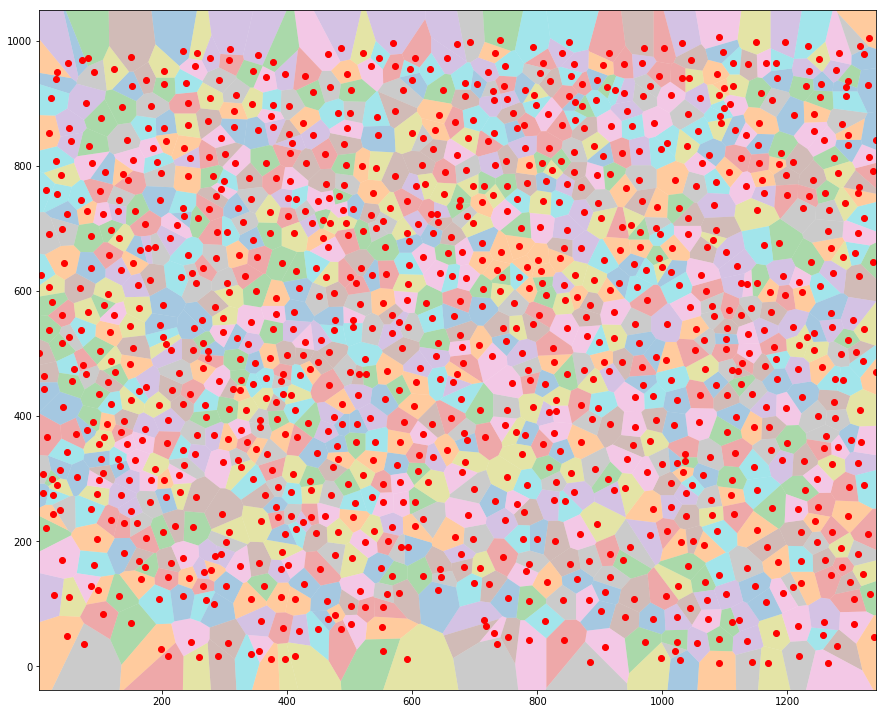

In [39]:
import matplotlib.pyplot as plt
width = 15
height = width / 1.2
fig= plt.figure(figsize=(width, height))

# make up data points
np.random.seed(1234)
points = np.random.rand(15, 2)



# compute Voronoi tesselation
# vor = Voronoi(points)
vor = Voronoi(df['tile-loc'])

# plot
regions, vertices = voronoi_finite_polygons_2d(vor)
# print "--"
# print regions
# print "--"
# print vertices

# plt = plt.figure()

# colorize
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

# plt.plot(points[:,0], points[:,1], 'ko')
plt.plot(df['tile-loc']['X.X'], df['tile-loc']['Y.Y'], 'ro')
plt.axis('equal')
plt.xlim(vor.min_bound[0], vor.max_bound[0])
plt.ylim(vor.min_bound[1], vor.max_bound[1])

# fig = plt.figure(figsize=(9,100))

In [ ]:
plt